# Video Processing Exploration - Phase 1

## Project: Smart Media Analyzer (Frugal Architecture)

### Goals
- Test video scene detection with PySceneDetect
- Document timing and accuracy for different video types

### Current Stack
- **Python:** 3.11.13 (UV managed)
- **Scene Detection:** PySceneDetect 0.6.6
- **Video Processing:** OpenCV 4.11.0

### Test Videos
- `Giant_Oarfish.mp4` - Nature documentary (~68 seconds)
- More videos to be added...

---

### Video Processing Setup - Testing imports and timing

In [ ]:
#!/usr/bin/env python3
"""
Video Processing Setup - Testing imports and timing
"""
import time
import os
from datetime import datetime
from datetime import datetime

def log_time(message):
    """Print message with timestamp for performance tracking"""
    timestamp = datetime.now().strftime("%H:%M:%S.%f")[:-3]
    print(f"[{timestamp}] {message}")

# Test imports with timing
log_time("=== Starting Video Processing Setup ===")

log_time("Importing cv2...")
start = time.time()
import cv2
log_time(f"cv2 imported in {time.time() - start:.3f}s - Version: {cv2.__version__}")

log_time("Importing scenedetect...")
start = time.time()
from scenedetect import detect, ContentDetector
log_time(f"scenedetect imported in {time.time() - start:.3f}s")

log_time("All imports successful!")

[13:57:53.970] === Starting Video Processing Setup ===
[13:57:53.971] Importing cv2...
[13:57:55.935] cv2 imported in 1.964s - Version: 4.11.0
[13:57:55.935] Importing scenedetect...
[13:57:58.060] scenedetect imported in 2.125s
[13:57:58.060] All imports successful!


### Analyzing video file using OpenCV module

In [10]:
def analyze_video_file(video_path):
    """Get detailed information about a video file"""
    log_time(f"Analyzing video file: {video_path}")
    
    # Check if file exists
    if not os.path.exists(video_path):
        print(f"ERROR: Video file not found: {video_path}")
        return None
    
    file_size_mb = os.path.getsize(video_path) / (1024 * 1024)
    log_time(f"File exists - Size: {file_size_mb:.2f} MB")
    
    # Get video properties using OpenCV
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("ERROR: Cannot open video with OpenCV")
        return None
    
    # Extract video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frame_count / fps if fps > 0 else 0
    
    cap.release()
    
    # Display results
    print(f"Current Time: {datetime.now()}")
    print(f" Video Properties:")
    print(f"   Resolution: {width} x {height}")
    print(f"   FPS: {fps:.2f}")
    print(f"   Duration: {duration:.2f} seconds")
    print(f"   Total Frames: {frame_count}")
    print(f"   File Size: {file_size_mb:.2f} MB")
    
    return {
        'width': width, 'height': height, 'fps': fps,
        'duration': duration, 'frames': frame_count, 'size_mb': file_size_mb
    }

# Test with your Giant Oarfish video
video_file = "../Samples_Video-Images/Giant_Oarfish.mp4"
print(f"Analyzing video file: {video_file}")
video_info = analyze_video_file(video_file)

Analyzing video file: ../Samples_Video-Images/Giant_Oarfish.mp4
[14:03:37.646] Analyzing video file: ../Samples_Video-Images/Giant_Oarfish.mp4
[14:03:37.647] File exists - Size: 11.76 MB
Current Time: 2025-07-21 14:03:37.661084
 Video Properties:
   Resolution: 1280 x 720
   FPS: 23.98
   Duration: 67.86 seconds
   Total Frames: 1627
   File Size: 11.76 MB


### Scene Detection Analysis

In [16]:
def detect_scenes_with_analysis(video_path, threshold=27.0):
    """
    Detect scenes and provide detailed analysis
    """
    log_time(f"Starting scene detection (threshold={threshold})")
    
    start_time = time.time()
    
    # Detect scenes using ContentDetector
    scene_list = detect(video_path, ContentDetector(threshold=threshold))
    
    detection_time = time.time() - start_time
    log_time(f"Scene detection completed in {detection_time:.2f}s")
    
    # Analysis
    total_scenes = len(scene_list)
    log_time(f"Found {total_scenes} scenes")
    
    if total_scenes == 0:
        print("⚠️  No scenes detected - video might be too uniform")
        return scene_list
    
    # Calculate scene statistics
    durations = []
    print(f"\n📊 Scene Analysis:")
    print(f"{'Scene':<8} {'Start':<8} {'End':<8} {'Duration':<10}")
    print("-" * 35)
    
    for i, scene in enumerate(scene_list):
        start_sec = scene[0].get_seconds()
        end_sec = scene[1].get_seconds()
        duration = end_sec - start_sec
        durations.append(duration)
        
        print(f"{i+1:<8} {start_sec:<8.2f} {end_sec:<8.2f} {duration:<10.2f}")
    
    # Statistics
    avg_duration = sum(durations) / len(durations)
    min_duration = min(durations)
    max_duration = max(durations)
    
    print(f"\n📈 Scene Statistics:")
    print(f"   Total scenes: {total_scenes}")
    print(f"   Average duration: {avg_duration:.2f}s")
    print(f"   Shortest scene: {min_duration:.2f}s")
    print(f"   Longest scene: {max_duration:.2f}s")
    print(f"   Processing speed: {67.86/detection_time:.1f}x real-time")
    
    return scene_list

# Run scene detection on your video
scenes = detect_scenes_with_analysis(video_file)

[15:18:02.887] Starting scene detection (threshold=27.0)
[15:18:05.377] Scene detection completed in 2.49s
[15:18:05.377] Found 34 scenes

📊 Scene Analysis:
Scene    Start    End      Duration  
-----------------------------------
1        0.00     1.33     1.33      
2        1.33     2.54     1.21      
3        2.54     5.21     2.67      
4        5.21     6.34     1.13      
5        6.34     10.30    3.96      
6        10.30    11.64    1.33      
7        11.64    12.89    1.25      
8        12.89    15.43    2.54      
9        15.43    16.60    1.17      
10       16.60    19.06    2.46      
11       19.06    21.94    2.88      
12       21.94    23.23    1.29      
13       23.23    25.61    2.38      
14       25.61    27.99    2.38      
15       27.99    29.07    1.08      
16       29.07    30.86    1.79      
17       30.86    32.24    1.38      
18       32.24    34.03    1.79      
19       34.03    35.95    1.92      
20       35.95    41.54    5.59      
21       

### Threshold Experimentation (Code Cell)

In [11]:
def test_multiple_videos_with_thresholds():
    """
    Test scene detection with multiple videos and different thresholds
    """
    log_time("=== Testing Multiple Video Files with Threshold Analysis ===")
    
    # List your available video files here
    video_files = [
        "../Samples_Video-Images/Giant_Oarfish.mp4",
        "../Samples_Video-Images/SoccorShootout_1.mp4"
    ]
    
    # Check which files exist
    available_videos = []
    for video_path in video_files:
        if os.path.exists(video_path):
            available_videos.append(video_path)
            print(f"✅ Found: {video_path}")
        else:
            print(f"❌ Missing: {video_path}")
    
    print(f"\n{'='*60}")
    
    # Test each video with different thresholds
    thresholds = [15.0, 20.0, 27.0, 35.0, 45.0]
    all_results = {}
    
    for video_path in available_videos:
        print(f"\n🎬 Analyzing: {os.path.basename(video_path)}")
        
        # Get video info first
        video_info = analyze_video_file(video_path)
        if not video_info:
            continue
            
        print(f"\n📊 Threshold Analysis for {os.path.basename(video_path)}:")
        print(f"{'Threshold':<12} {'Scenes':<8} {'Avg Duration':<12} {'Time':<8}")
        print("-" * 45)
        
        video_results = []
        
        for threshold in thresholds:
            start_time = time.time()
            scene_list = detect(video_path, ContentDetector(threshold=threshold))
            detection_time = time.time() - start_time
            
            scene_count = len(scene_list)
            avg_duration = video_info['duration'] / scene_count if scene_count > 0 else 0
            
            video_results.append({
                'threshold': threshold,
                'scenes': scene_count,
                'avg_duration': avg_duration,
                'time': detection_time
            })
            
            print(f"{threshold:<12} {scene_count:<8} {avg_duration:<12.2f} {detection_time:<8.2f}s")
        
        all_results[video_path] = {
            'info': video_info,
            'threshold_results': video_results
        }
        
        print(f"\n{'='*60}")
    
    # Comparison summary
    if len(available_videos) > 1:
        print(f"\n🔍 Video Comparison Summary (threshold=27.0):")
        print(f"{'Video':<25} {'Duration':<10} {'Scenes':<8} {'Avg Scene':<10} {'Type':<15}")
        print("-" * 75)
        
        for video_path in available_videos:
            if video_path in all_results:
                info = all_results[video_path]['info']
                # Find threshold=27.0 result
                result_27 = next(r for r in all_results[video_path]['threshold_results'] if r['threshold'] == 27.0)
                
                video_name = os.path.basename(video_path)[:20]
                video_type = "Nature Doc" if "oarfish" in video_path.lower() else "Sports" if "soccor" in video_path.lower() else "Unknown"
                
                print(f"{video_name:<25} {info['duration']:<10.1f} {result_27['scenes']:<8} {result_27['avg_duration']:<10.2f} {video_type:<15}")
    
    return all_results

# Run multi-video threshold analysis
multi_video_results = test_multiple_videos_with_thresholds()

[14:04:06.090] === Testing Multiple Video Files with Threshold Analysis ===
✅ Found: ../Samples_Video-Images/Giant_Oarfish.mp4
✅ Found: ../Samples_Video-Images/SoccorShootout_1.mp4


🎬 Analyzing: Giant_Oarfish.mp4
[14:04:06.090] Analyzing video file: ../Samples_Video-Images/Giant_Oarfish.mp4
[14:04:06.090] File exists - Size: 11.76 MB
Current Time: 2025-07-21 14:04:06.103818
 Video Properties:
   Resolution: 1280 x 720
   FPS: 23.98
   Duration: 67.86 seconds
   Total Frames: 1627
   File Size: 11.76 MB

📊 Threshold Analysis for Giant_Oarfish.mp4:
Threshold    Scenes   Avg Duration Time    
---------------------------------------------
15.0         38       1.79         2.62    s
20.0         38       1.79         2.58    s
27.0         34       2.00         2.53    s
35.0         32       2.12         2.42    s
45.0         23       2.95         2.64    s


🎬 Analyzing: SoccorShootout_1.mp4
[14:04:18.890] Analyzing video file: ../Samples_Video-Images/SoccorShootout_1.mp4
[14:04:18.890

### Frame Extraction Function
Extract the frames from the above scene detection logic.

[15:18:20.393] === Testing Frame Extraction ===
[15:18:20.393] Extracting keyframes from 34 scenes...
[15:18:20.909] ✅ Extracted 34 keyframes from 34 scenes
[15:18:20.909] Displaying first 9 keyframes...


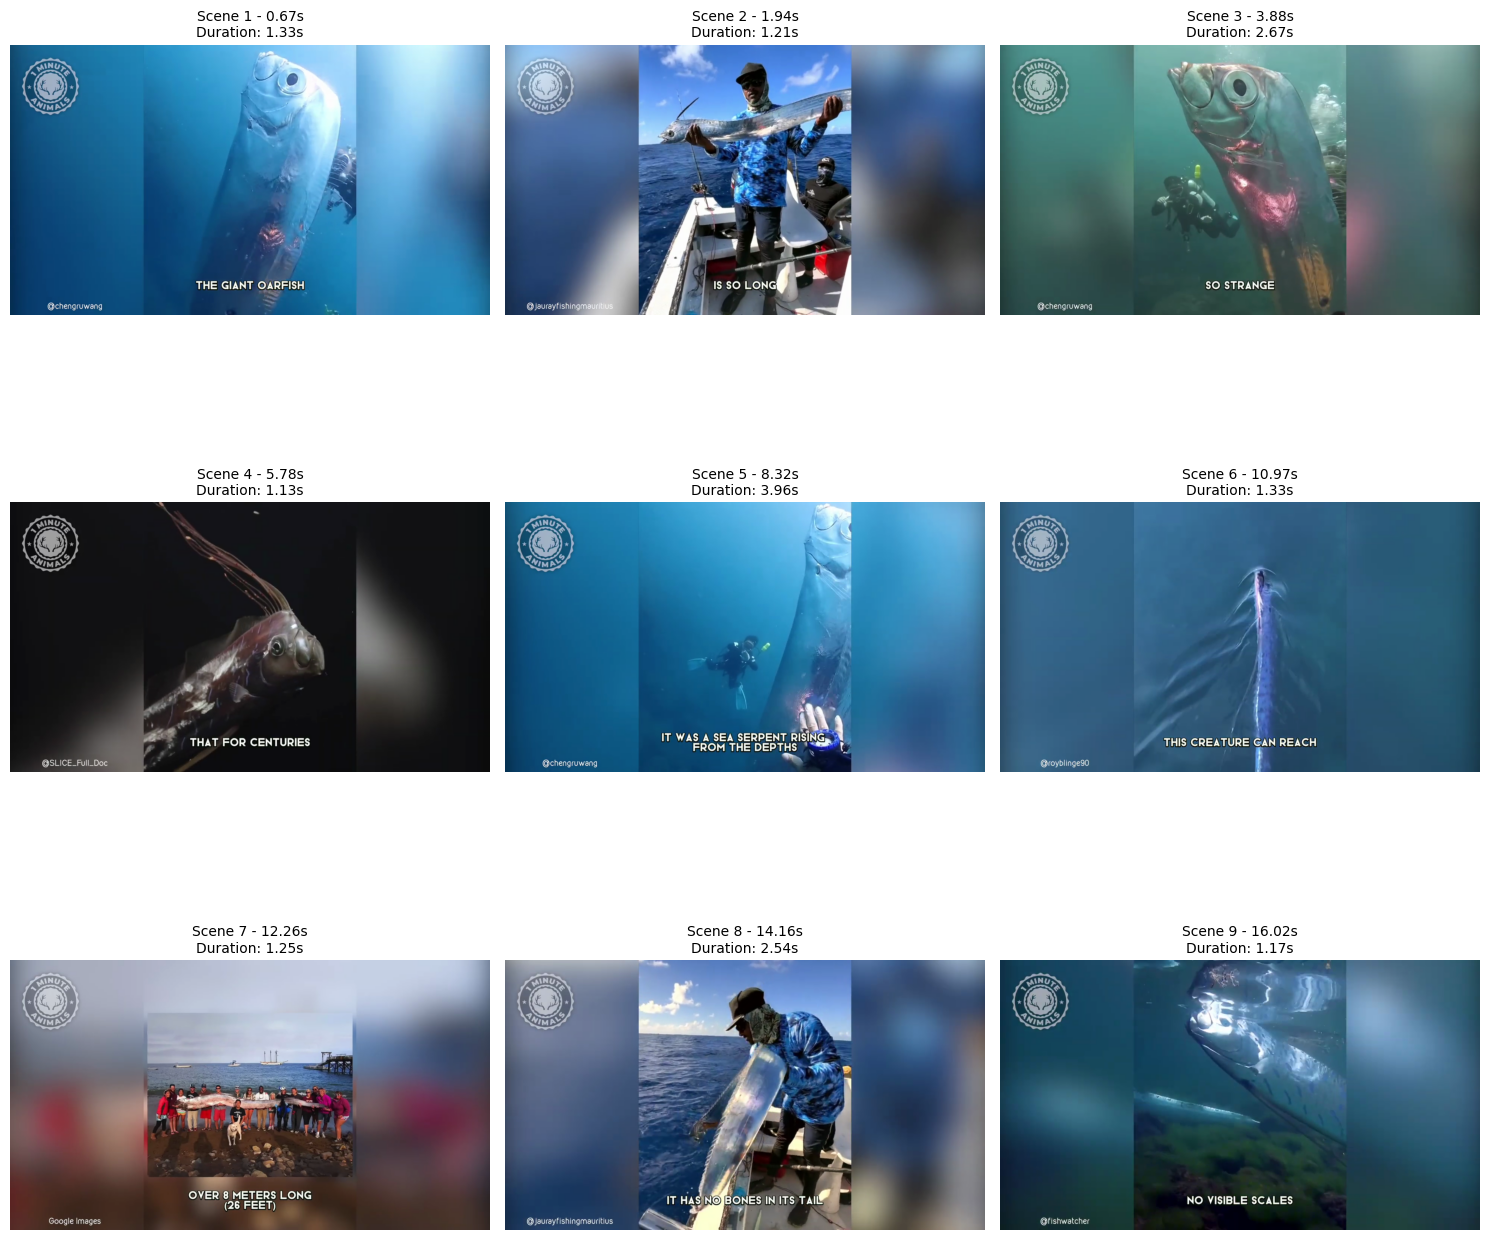

[15:18:22.039] 📄 Saved metadata for 34 frames to giant_oarfish_keyframes.json


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100

def extract_keyframes_from_scenes(video_path, scene_list, frames_per_scene=1, frame_position='middle'):
    """
    Extract keyframes from detected scenes
    
    Args:
        video_path: Path to video file
        scene_list: List of scenes from PySceneDetect
        frames_per_scene: Number of frames to extract per scene (1, 2, or 3)
        frame_position: 'start', 'middle', 'end', or 'all'
    
    Returns:
        List of frame data with metadata
    """
    log_time(f"Extracting keyframes from {len(scene_list)} scenes...")
    
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Cannot open video: {video_path}")
        return []
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames_extracted = 0
    extracted_frames = []
    
    for scene_idx, scene in enumerate(scene_list):
        scene_start_sec = scene[0].get_seconds()
        scene_end_sec = scene[1].get_seconds()
        scene_duration = scene_end_sec - scene_start_sec
        
        # Calculate frame positions based on preference
        frame_times = []
        
        if frame_position == 'start':
            frame_times = [scene_start_sec + 0.1]  # 0.1s after start
        elif frame_position == 'end':
            frame_times = [scene_end_sec - 0.1]    # 0.1s before end
        elif frame_position == 'middle':
            frame_times = [scene_start_sec + (scene_duration / 2)]
        elif frame_position == 'all' and frames_per_scene == 3:
            frame_times = [
                scene_start_sec + (scene_duration * 0.2),  # 20% into scene
                scene_start_sec + (scene_duration * 0.5),  # 50% into scene  
                scene_start_sec + (scene_duration * 0.8)   # 80% into scene
            ]
        
        # Extract frames at calculated times
        for frame_idx, frame_time in enumerate(frame_times):
            frame_number = int(frame_time * fps)
            
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
            ret, frame = cap.read()
            
            if ret:
                # Convert BGR to RGB for matplotlib
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                
                extracted_frames.append({
                    'scene_number': scene_idx + 1,
                    'frame_index': frame_idx + 1,
                    'timestamp': frame_time,
                    'scene_start': scene_start_sec,
                    'scene_end': scene_end_sec,
                    'scene_duration': scene_duration,
                    'frame_number': frame_number,
                    'frame_data': frame_rgb,
                    'frame_shape': frame_rgb.shape
                })
                
                total_frames_extracted += 1
    
    cap.release()
    log_time(f"✅ Extracted {total_frames_extracted} keyframes from {len(scene_list)} scenes")
    
    return extracted_frames

def visualize_extracted_keyframes(extracted_frames, max_display=10):
    """
    Display extracted keyframes in a grid
    """
    if not extracted_frames:
        print("❌ No frames to display")
        return
    
    frames_to_show = min(max_display, len(extracted_frames))
    log_time(f"Displaying first {frames_to_show} keyframes...")
    
    # Calculate grid dimensions
    cols = 3 if frames_to_show > 6 else 2 if frames_to_show > 2 else 1
    rows = (frames_to_show + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1 and cols == 1:
        axes = [axes]
    elif rows == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i in range(frames_to_show):
        frame_info = extracted_frames[i]
        
        axes[i].imshow(frame_info['frame_data'])
        axes[i].set_title(
            f"Scene {frame_info['scene_number']} - {frame_info['timestamp']:.2f}s\n"
            f"Duration: {frame_info['scene_duration']:.2f}s", 
            fontsize=10
        )
        axes[i].axis('off')
    
    # Hide empty subplots
    for i in range(frames_to_show, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def save_keyframes_metadata(extracted_frames, output_file="keyframes_metadata.json"):
    """
    Save keyframe metadata to JSON file (without actual image data)
    """
    import json
    
    metadata = []
    for frame_info in extracted_frames:
        metadata.append({
            'scene_number': frame_info['scene_number'],
            'frame_index': frame_info['frame_index'],
            'timestamp': frame_info['timestamp'],
            'scene_start': frame_info['scene_start'],
            'scene_end': frame_info['scene_end'],
            'scene_duration': frame_info['scene_duration'],
            'frame_number': frame_info['frame_number'],
            'frame_shape': frame_info['frame_shape']
        })
    
    with open(output_file, 'w') as f:
        json.dump(metadata, f, indent=2)
    
    log_time(f"📄 Saved metadata for {len(metadata)} frames to {output_file}")

# Test frame extraction with your video
log_time("=== Testing Frame Extraction ===")

# Extract middle frame from each scene for Giant Oarfish video
oarfish_frames = extract_keyframes_from_scenes(
    "../Samples_Video-Images/Giant_Oarfish.mp4", 
    scenes,  # Using scenes from previous cell
    frames_per_scene=1,
    frame_position='middle'
)

# Display the keyframes
visualize_extracted_keyframes(oarfish_frames, max_display=9)

# Save metadata
save_keyframes_metadata(oarfish_frames, "giant_oarfish_keyframes.json")